# Problem Statement

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). The model to be used is Simple Linear Regression, as we have 2 variables and we assume linearity
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

### There are four assumptions associated with a linear regression model:

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data

df = pd.read_csv('IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
# Getting the Descriptive Statistics

df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
# Get the Info of Each columns in the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
# Identify is there are any missing value in the dataframe

pd.DataFrame({'Columns':df.isna().sum().index, 'No. of Missing Values': df.isna().sum().values, '% Missing': \
              df.isna().sum().values/len(df)})

,Columns,No. of Missing Values,% Missing
0,Temperature,0,0.0
1,Revenue,0,0.0


### Dataset Visualisation

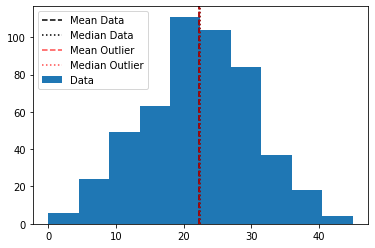

In [13]:
# Visualize the Mean, Median, Mode of the Dataset via Histogram

# Plot Histogram for Temperature

plt.hist(df['Temperature'], label= "Data");
plt.axvline(np.mean(df['Temperature']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Temperature']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Temperature']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Temperature']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

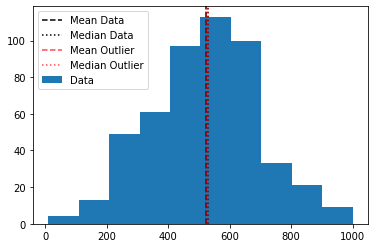

In [14]:
# Plot Histogram for Revenue

plt.hist(df['Revenue'], label= "Data");
plt.axvline(np.mean(df['Revenue']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Revenue']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Revenue']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Revenue']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

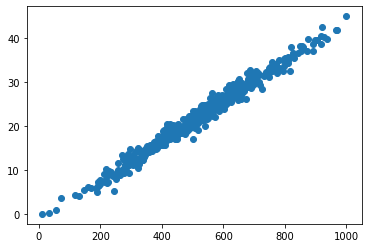

In [15]:
# Plot Scatter Plot
plt.scatter(df['Revenue'], df['Temperature'], )
plt.show();

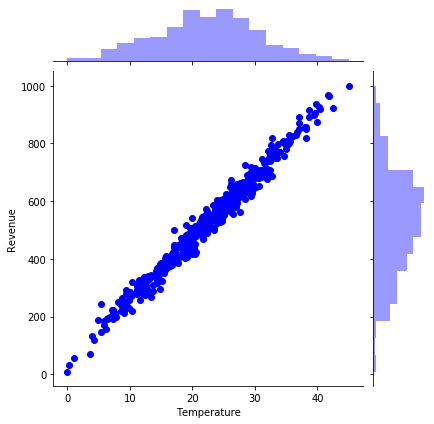

In [18]:
# Using Jointplot to Visualize the Distribution and Scatter

sns.jointplot(x='Temperature', y='Revenue', data = df, color = 'blue');

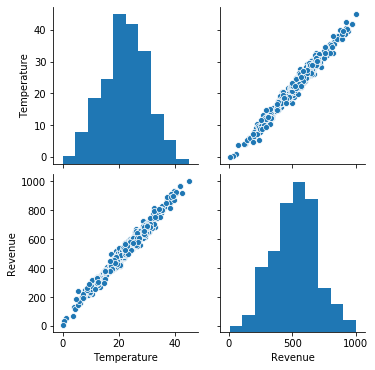

In [19]:
# Use PairPlot to visualize the paired data

sns.pairplot(df);

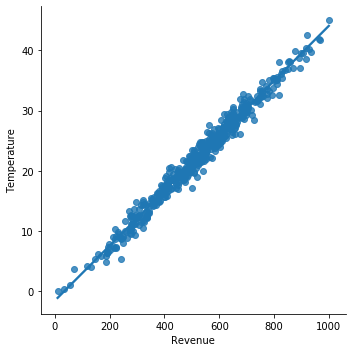

In [21]:
# Add Just a Straightline to data

sns.lmplot('Revenue', 'Temperature', data= df);
# It Just Fits a line to Data, not via any mathematical modelling

#### We can see there is a `LINEAR RELATIONSHIP` present in the Data

### Modelling of Machine Learning

In [22]:
from sklearn.model_selection import train_test_split

In [43]:
X = df[['Temperature']]
y = df[['Revenue']]

In [46]:
print("The type of X is {} and Type of y is {}".format(type(X), type(y)))

The type of X is <class 'pandas.core.frame.DataFrame'> and Type of y is <class 'pandas.core.frame.DataFrame'>


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df[['Temperature']], df[['Revenue']], test_size= 0.25, \
                                                    shuffle= True, random_state= 42)

In [48]:
# Display, First the Revenue and Temperature

display(y_train.head())
X_train.head()

,Revenue
227,618.172091
417,649.729072
203,278.309844
126,382.073954
329,965.493040


,Temperature
227,26.944123
417,27.516646
203,10.447126
126,15.992347
329,41.924446


In [58]:
# Training the Model

from sklearn.linear_model import LinearRegression

#### Fit the Model with No Intercept

In [79]:
# Fit the Model with No Intercept

regressor = LinearRegression(fit_intercept = False) # It keeps the intercept as 0. The Line will be Forced to go through Origin
regressor.fit(X_train.values,y_train.values)

# Getting the Coefficients

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[23.23628587]]
Linear Model Coefficient (b):  0.0


### Plotting the Predictions

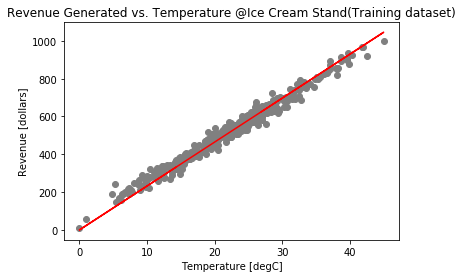

In [80]:
# Plotting for the Training Data

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)');

# The Line is Forced to pass through the Origin

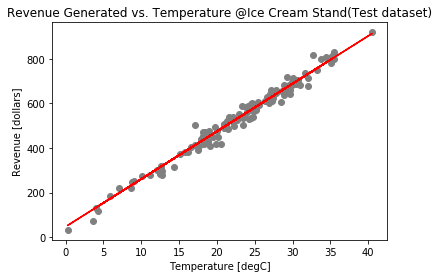

In [69]:
# Plotting for the Training Data

plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red') # Plot the Slope v Intercept that best fits the Data, using OLS
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Test dataset)');

#### Fit the Model with Intercept

In [81]:
# Fit the Model with Intercept

regressor = LinearRegression(fit_intercept = True) # It keeps the intercept as 0. The Line will fit as per OLS method
regressor.fit(X_train.values,y_train.values)

# Getting the Coefficients

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[21.37416109]]
Linear Model Coefficient (b):  [46.91078475]


### The Equation of Straight line is : y = mx + b

m = 21.37, b = 46.91

### Plotting the Predictions

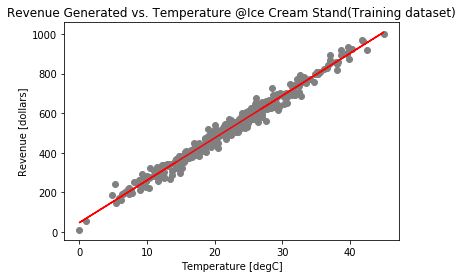

In [82]:
# Plotting for the Training Data

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)');

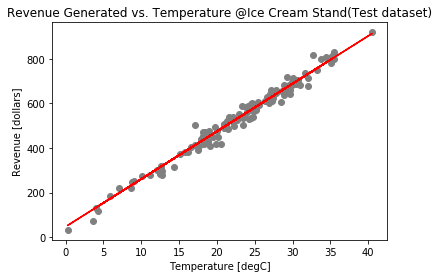

In [83]:
# Plotting for the Training Data

plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red') # Plot the Slope v Intercept that best fits the Data, using OLS
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Test dataset)');

In [99]:
# Check our Slope and Intercept with data

df.head(1)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [85]:
# Predict revenue for Temperature 24.

# Create Function
def slr(x):
    y = (21.37 * x) + 46.91
    return(y)

print("The revenue Predicted is: {} when the Temperature is 24.56 degree celsius".format(slr(24.56)))

The revenue Predicted is: 571.7572 when the Temperature is 24.56 degree celsius


In [98]:
# Predict the model via Model

temperature = 24.56
print("The Model Predicted Value is:", regressor.predict( [[temperature]] )) # We use [[]] as the Model can read only Dataframe

The Model Predicted Value is: [[571.86018112]]


In [110]:
# Get the Predicted Temperature Value of First 5 Temperature Value in Dataframe

for i in df['Temperature'].head(5):
    print("The revenue Predicted via Calculated Slope and Intercept is is: {} when the Temperature is {} degree celsius"\
          .format(slr(i), round(i, 2)))
    print("The Model Predicted Value is:", str(regressor.predict( [[i]] )) + 'When temperature is:', i)
    print('\n')

The revenue Predicted via Calculated Slope and Intercept is is: 571.9043200554 when the Temperature is 24.57 degree celsius
The Model Predicted Value is: [[572.00732982]]When temperature is: 24.56688442


The revenue Predicted via Calculated Slope and Intercept is is: 602.6409348755001 when the Temperature is 26.01 degree celsius
The Model Predicted Value is: [[602.74992956]]When temperature is: 26.00519115


The revenue Predicted via Calculated Slope and Intercept is is: 640.7941364156001 when the Temperature is 27.79 degree celsius
The Model Predicted Value is: [[640.91056016]]When temperature is: 27.79055388


The revenue Predicted via Calculated Slope and Intercept is is: 487.03231001849997 when the Temperature is 20.6 degree celsius
The Model Predicted Value is: [[487.11879381]]When temperature is: 20.59533505


The revenue Predicted via Calculated Slope and Intercept is is: 292.7397445668 when the Temperature is 11.5 degree celsius
The Model Predicted Value is: [[292.7883964]]Whe

In [111]:
# Get the First 5 values of the Dataframe
df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## With the above model, we have predicted the Daily revenue (in `$`) by the help of Simple Linear Regression